# Dataset Prep.

In [75]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [30]:
p =  Path("../Image Classification using SVM/Images/")
dirs = p.glob("*")

labels_dict={"cat":0, "dog":1, "horse": 2, "human": 3}
image_data = []
labels = []
for folder in dirs:
    label = str(folder).split('\\')[-1][:-1]
    

    
    for img_path in folder.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        
        

In [18]:
print(len(image_data))
print(labels)

808
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)


In [32]:
print(image_data.shape)

(808, 32, 32, 3)


In [33]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data, labels = zip(*combined)

### Visualise Data

In [22]:
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

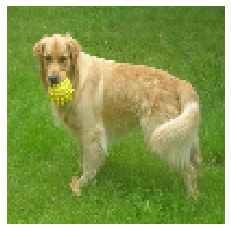

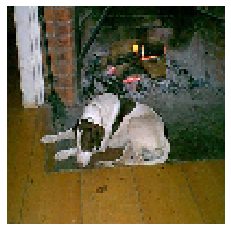

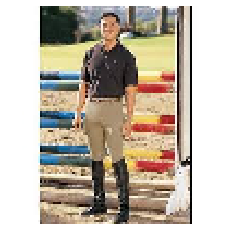

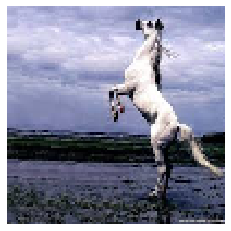

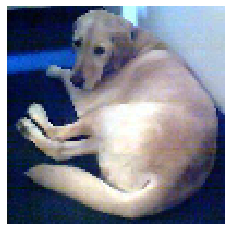

In [23]:
for i in range(0,5):
    drawImg(image_data[i])

# Classifier

In [24]:
class SVM:

    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### Converting data so that one vs one classification can be achieved

In [34]:
image_data=np.array(image_data)
labels = np.array(labels)

In [35]:
print(image_data.shape)
print(labels.shape)

(808, 32, 32, 3)
(808,)


In [36]:
# Falttern images

In [37]:
m=image_data.shape[0]
image_data = image_data.reshape(m,-1)

print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [38]:
nc = len(np.unique(labels))

In [40]:
def classWiseData(x,y):
    data = {}
    
    for i in range(nc):
        data[i]=[]
    for i in range (x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
    return data

In [41]:
data = classWiseData(image_data,labels)

In [43]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

202
202
202
202


In [53]:
def getDataPair(d1,d2):
        """Combines data of two classes into single-single matrices"""
        l1,l2=d1.shape[0], d2.shape[0]
        samples = l1+l2
        features = d1.shape[1]
        
        data_pair = np.zeros((samples,features))
        data_labels = np.zeros((samples,))
        
        data_pair[:l1,:] = d1
        data_pair[l1:,:] = d2
        data_labels[:l1] = -1
        data_labels[l1:] = 1
        
        return data_pair, data_labels
        

# The nC2 classifiers

In [49]:
mySVM = SVM()

In [76]:
def trainSVMs():
    svm_classifers = {}
    for i in range (nc):
        svm_classifers[i] = {}
        for j in range(i+1, nc):
            xpair, ypair = getDataPair(data[i],data[j])
            wts, bias, loss = mySVM.fit(xpair,ypair, learning_rate=0.00001, maxItr=1000)
            
            svm_classifers[i][j] = (wts,bias)
            plt.plot(loss)
            plt.show()
            
    return svm_classifers

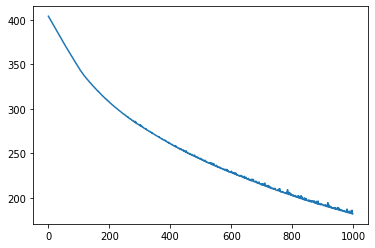

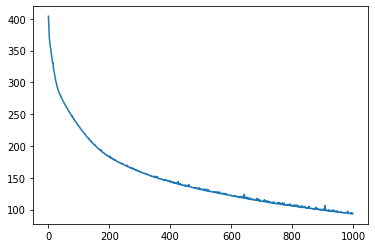

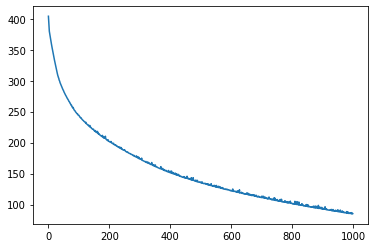

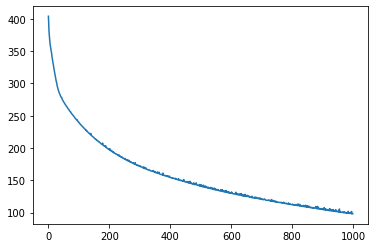

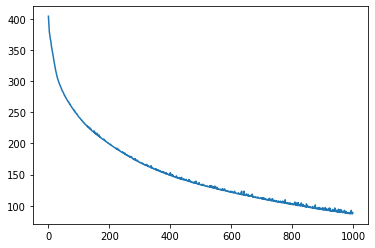

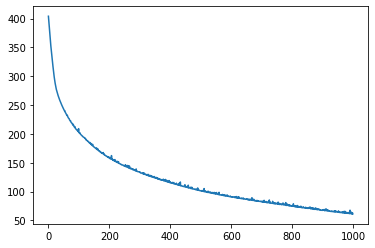

In [77]:
svm_classifiers = trainSVMs()

In [58]:
svm_classifiers[0][1]

(array([[-0.05089391,  0.23185605,  0.10040234, ..., -0.0445028 ,
          0.10482205, -0.07687365]]),
 -0.32199999999999945)

# Prediction

In [63]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [67]:
def predict(x):
    
    count = np.zeros((nc,))
    
    for i in range (nc):
        for j in range (i+1, nc):
            w,b = svm_classifiers[i][j]
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j]+=1
            else:
                count[i]+=1
            
    p = np.argmax(count)        
    #print(count)
    return p
            

In [69]:
print(predict(image_data[0]))
print(labels[0])

1
0


In [71]:
def accuracy(x,y):
    
    count = 0
    
    for i in range (x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
        
    return count/x.shape[0]
    

In [79]:
accuracy(image_data,labels)

0.8143564356435643

In [78]:
from sklearn import svm

In [80]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)

In [82]:
svm_classifier.fit(image_data, labels)
svm_classifier.score(image_data, labels)

1.0